In [34]:
import pandas as pd
from matplotlib import pyplot as plt

import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import eli5
from eli5.sklearn import PermutationImportance

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
    
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

from nltk.stem.snowball import SnowballStemmer

In [35]:
stop_words = set(stopwords.words('english')) 
stemmer = SnowballStemmer("english")
analyser = SentimentIntensityAnalyzer()

In [36]:
b = pd.read_csv("2_KS_train_w_vader.csv")
df = pd.read_csv("KS_train_final.csv")
df['blurb'] = b['blurb']
df['blurb'].fillna(" ", inplace=True)

for index, value in df['blurb'].items():
    
    s = "".join([ c if c.isalpha() else " " for c in value ])
    s = s.lower()
    word_tokens = word_tokenize(s)
    filtered_sentence = [] 
  
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(stemmer.stem(w))
            
    s = ' '.join(filtered_sentence)
    
    df.at[index, 'clean_blurb'] = s
    
df = df.drop(['blurb'], axis=1)


In [37]:
df.head(5)

,staff_pick,funded,is_cat_art,is_cat_music,is_cat_film,is_cat_technology,is_cat_publishing,is_cat_food,is_cat_games,is_cat_fashion,...,is_2017,is_2018,sentiment_pos,sentiment_neu,sentiment_neg,blurb_bayes,log_goal_usd,log_days_to_launch,log_days_to_dealine,clean_blurb
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.770405,0.536852,0.571877,0.636119,artist resid elsewher studio summer stretch wi...
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.913929,0.557160,0.417726,0.786681,artist public art make instal washington mall ...
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.660800,0.561670,0.269857,0.890160,sequel favorit machin myphoneheng celebr commu...
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.993950,0.572900,0.285142,0.624541,film explor role valu art educ today histori s...
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.623790,0.608693,0.515240,0.713862,need build kitchen habit space self sustain fa...


In [38]:
X = df.drop(['funded'], axis=1)
y = df['funded']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [41]:
####### NAIVE BAYES on train data #########

X_NB_train = X_train.clean_blurb
vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(X_NB_train.values)
classifierNB = MultinomialNB(alpha=1)
targets = y_train.values
classifierNB.fit(counts, targets)
predictions = classifierNB.predict_proba(counts)
X_train['blurb_bayes'] = predictions.T[1]
X_train = X_train.drop(['clean_blurb'], axis=1)

c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [42]:
X_train.head(5)

,staff_pick,is_cat_art,is_cat_music,is_cat_film,is_cat_technology,is_cat_publishing,is_cat_food,is_cat_games,is_cat_fashion,is_cat_comics,...,is_2016,is_2017,is_2018,sentiment_pos,sentiment_neu,sentiment_neg,blurb_bayes,log_goal_usd,log_days_to_launch,log_days_to_dealine
53779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.028766,0.512899,0.388768,0.713862
51976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.979398,0.532002,0.395099,0.713862
48953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.218659,0.613578,0.417726,0.713862
13609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.996608,0.463114,0.510248,0.557388
34131,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.853571,0.546403,0.465047,0.752808


In [27]:
classifier = MLPClassifier(activation='tanh', batch_size=32, hidden_layer_sizes=(40, 40, 40, 40), learning_rate_init=0.001, max_iter= 2000, solver='sgd')

In [28]:
classifier.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size=32, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(40, 40, 40, 40), learning_rate='constant',
              learning_rate_init=0.001, max_iter=2000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

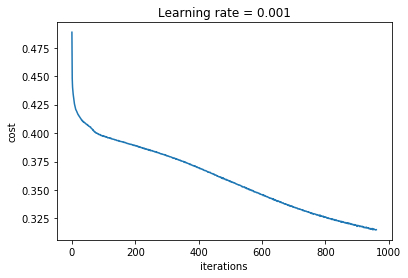

In [29]:
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate = " + str(0.001))
plt.plot(classifier.loss_curve_)
plt.show()

In [30]:
classifier.score(X_train, y_train)

0.8613202440704655

In [43]:
####### NAIVE BAYES on test data #########

counts = vectorizer.transform(X_test.clean_blurb.values)
predictions = classifierNB.predict_proba(counts)

X_test['blurb_bayes'] = predictions.T[1]
X_test = X_test.drop(['clean_blurb'], axis=1)

c:\users\ajay mota\pycharmprojects\bit\venv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [44]:
classifier.score(X_test, y_test)

0.7428551512616758

In [45]:
perm = PermutationImportance(classifier, random_state=1).fit(X_test, y_test)

In [46]:
# With sentiment_com instead of sentiment_pos
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=40)

Weight,Feature
0.1092 ± 0.0020,blurb_bayes
0.0434 ± 0.0049,log_goal_usd
0.0308 ± 0.0033,staff_pick
0.0191 ± 0.0029,log_days_to_launch
0.0188 ± 0.0030,is_2014
0.0180 ± 0.0030,is_2015
0.0130 ± 0.0034,is_2013
0.0106 ± 0.0024,sentiment_pos
0.0088 ± 0.0013,is_2011
0.0086 ± 0.0019,sentiment_neu


In [52]:
wdf = eli5.format_as_dataframe(eli5.explain_weights(perm, feature_names = X_test.columns.tolist(), top=40))

In [53]:
wdf.head(5)

,feature,weight,std
0,blurb_bayes,0.109229,0.001008
1,log_goal_usd,0.043357,0.002457
2,staff_pick,0.030796,0.001639
3,log_days_to_launch,0.019099,0.001428
4,is_2014,0.018835,0.001478


In [56]:
W = wdf['weight'].sum()

In [57]:
W

0.3713508992053557

In [60]:
wdf['normalized_weight'] = wdf['weight']/W * 100

In [61]:
wdf.head(5)

,feature,weight,std,normalized_weight
0,blurb_bayes,0.109229,0.001008,29.413973
1,log_goal_usd,0.043357,0.002457,11.675489
2,staff_pick,0.030796,0.001639,8.292976
3,log_days_to_launch,0.019099,0.001428,5.143222
4,is_2014,0.018835,0.001478,5.071892


<IPython.core.display.Javascript object>


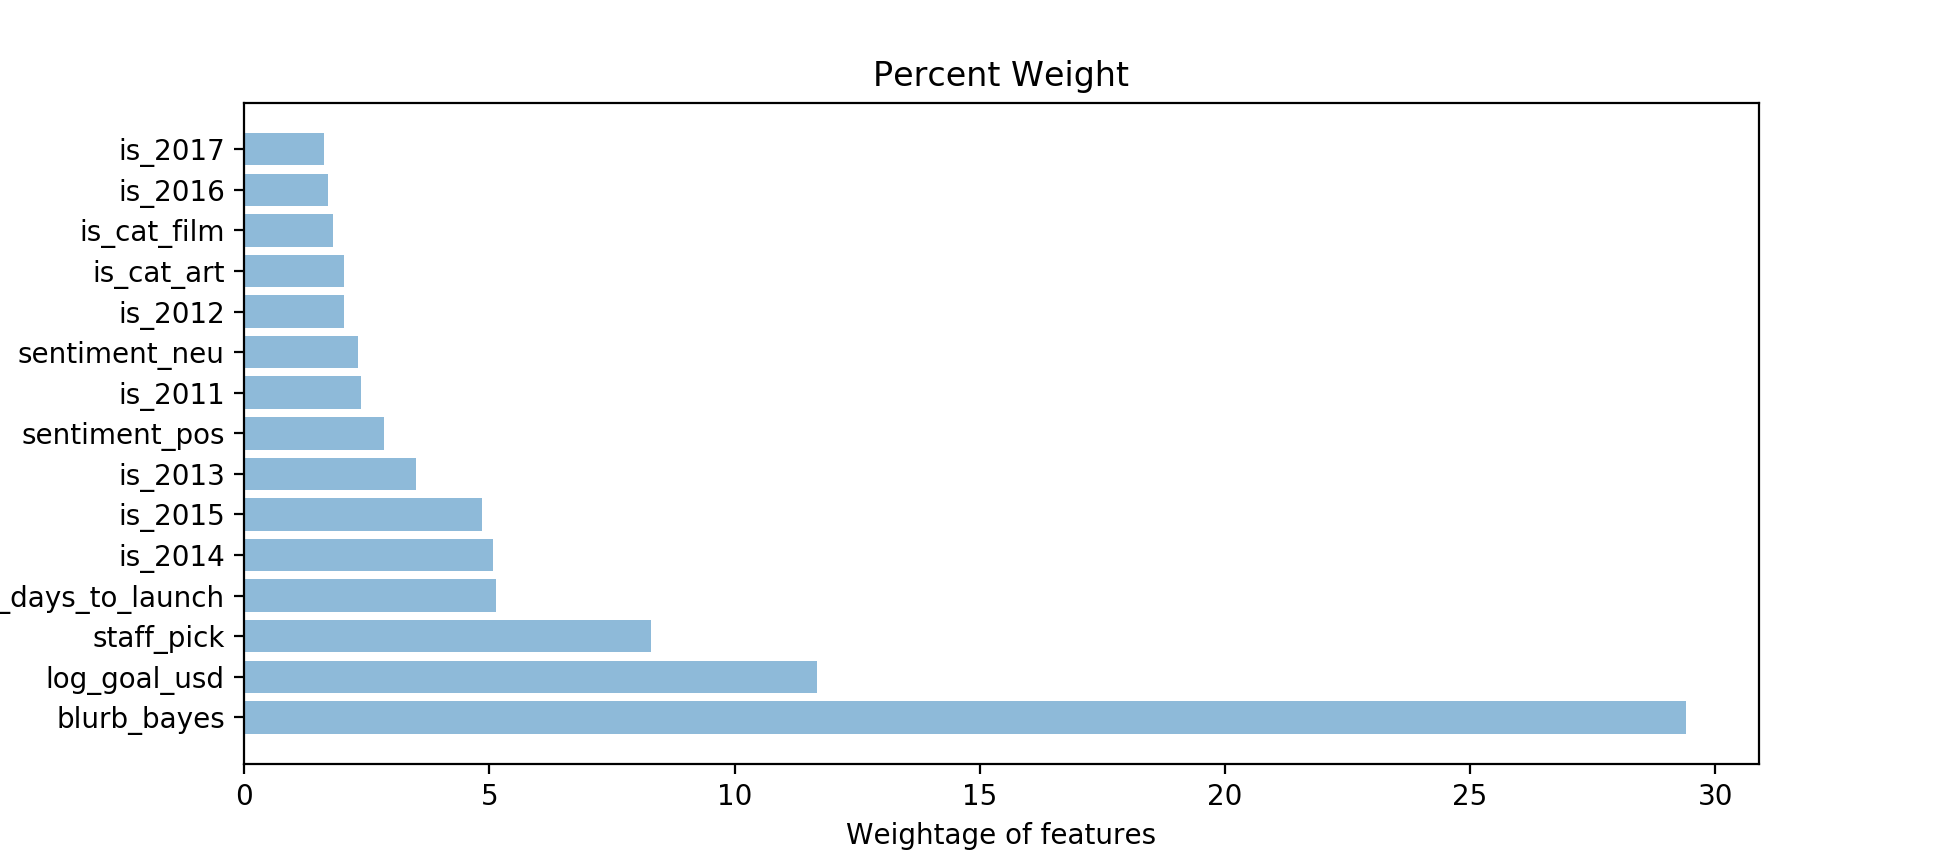

In [67]:
%matplotlib notebook
plt.barh(wdf['feature'].head(15), wdf['normalized_weight'].head(15), align='center', alpha=0.5)
plt.yticks(wdf['feature'].head(15))
plt.xlabel('Weightage of features')
plt.title('Percent Weight')

plt.show()

<IPython.core.display.Javascript object>


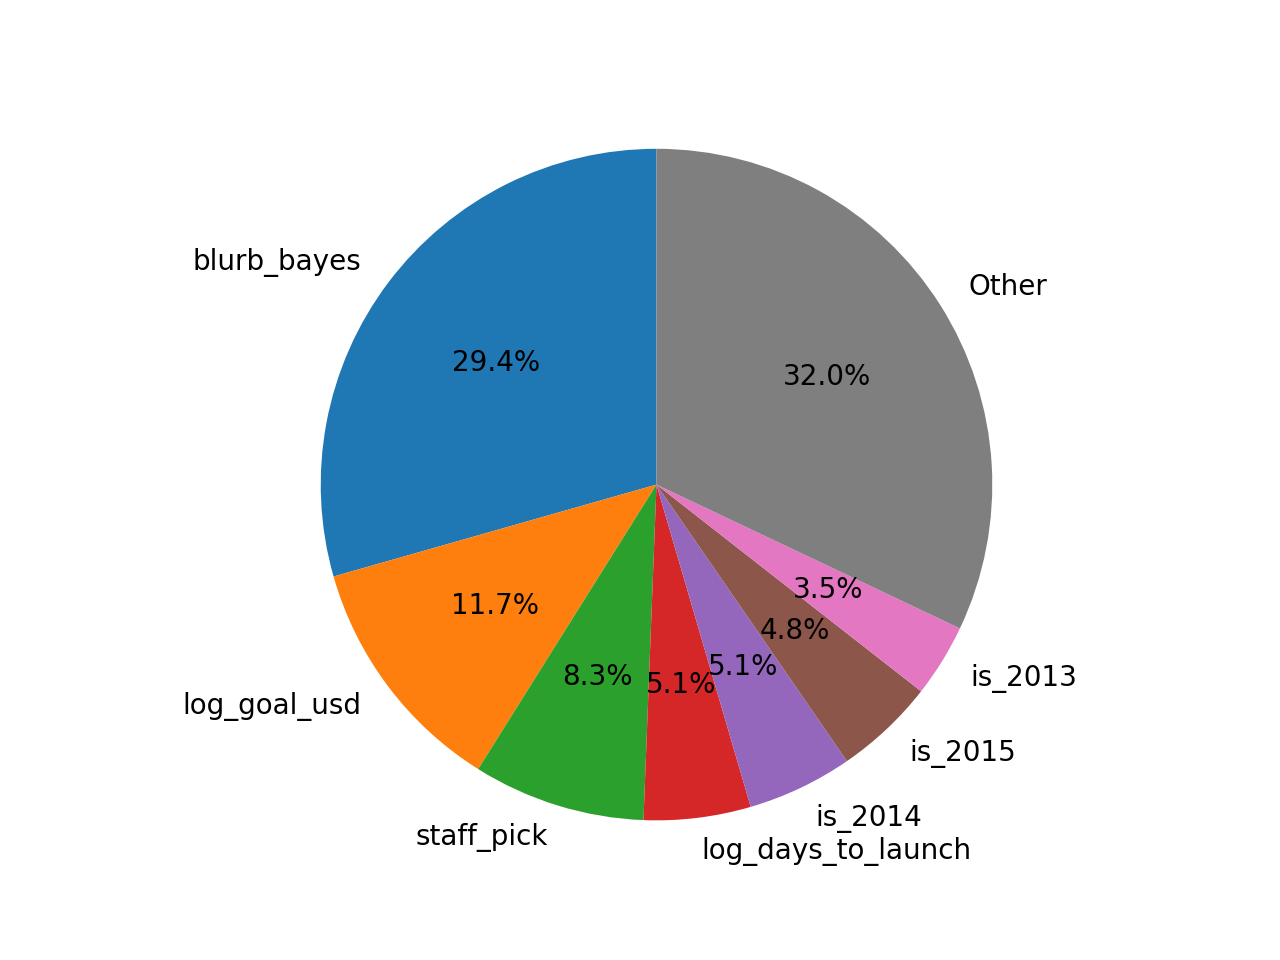

In [95]:
%matplotlib notebook
sizes = wdf['normalized_weight'].head(7)
s = wdf['normalized_weight'][7:].sum()
sizes[7] = s

labels = wdf['feature'].head(7)
labels[7] = 'Other'

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()